# Phase by Correlation

##### Continuous Cross Correlation
For signals $u(t)$ and $v(t)$ 
and correlation parameter $\tau$:

$$
 Corr(\tau; u, v)
  =
  \int_{-\infty}^\infty \mathrm{d}t \; u(t) \, v^*(t - \tau)
$$


##### Discrete Cross Correlation
For signals $u[n]$ and $v[n]$ 
and correlation parameter $k$:

$$
 Corr(k; u, v)
  = \sum_n u[n] \, v^*[n-k]
$$

---

Writing

$$
 u(t, \phi_t) = A_1 \exp(2i \pi f t + \phi_t)
$$


Correlation $u \triangleq u(t_1, \phi_{t1})$ and $ v \triangleq u(t_2, \phi_{t2}) $:

$$
 Corr(\vec{\tau}; u_1, u_2)
  =
  \int_{-\infty}^\infty \mathrm{d}\vec{\zeta} \; u_1(\vec{\zeta}) \, u_2^*(\vec{\zeta} - \vec{\tau})
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
rng = np.random.default_rng()

In [2]:
class SineWave:
    """
        A periodic sine wave, totally described by its frequencies, phases and amplitudes.
    """
    def __init__(self, frequencies, phase = 0, amplitude = 1):
        self.freqs = frequencies
        self.phase = phase
        self.amplitude = amplitude
    
    def __call__(self, time, complx=True):
        if complx:
            return self.amplitude * np.exp( 2j * self.freqs*time + 2j * self.phase)
        else:
            return self.amplitude * np.cos( self.freqs*time + self.phase)

### Initial signal

In [5]:
mysignal = SineWave( 5e1, np.pi/2, 1)

In [6]:
# show the signals
print("Frequencies:", signal.freqs)
print("Phase:", "{}π".format(signal.phase/np.pi))
print("Amplitude:", signal.amplitude)

Frequencies: 50.0
Phase: 0.5π
Amplitude: 1


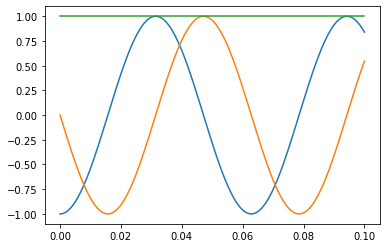

In [7]:
timing = np.linspace( 0, 5/signal.freqs, int(signal.freqs*4))
raw = mysignal(timing)

fig, ax = plt.subplots()
ax.plot(timing, raw.real)
ax.plot(timing, raw.imag)
ax.plot(timing, np.abs(raw))

### Correlate signal with a sine wave


$$ u[n] = \exp(2 \pi i f \frac{n}{f_s} + i\phi_t)$$
sampled with $f_s$, such that $N = f_s T$

$$ v(t; f, \chi) = \exp(2 \pi i f t + i\chi ) $$

---

$$\begin{align}
Corr(\eta; u[n], v(t)) 
    &= \sum_{n=0}^{N-1} u[n] \; v^*(t - \eta; f, \chi) \quad \quad \quad \quad \quad \quad \quad \quad \quad \\
    &= \sum_{n=0}^{N-1} u[n] \; \exp(-2 \pi i f ( t - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} u[n] \; \exp(-2 \pi i f ( \frac{n}{f_s} - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} \exp(2 \pi i f \frac{n}{f_s} + i\phi_t) \; \exp(-2 \pi i f ( \frac{n}{f_s} - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} \exp(2 \pi i f \frac{n}{f_s} + i\phi_t -2 \pi i f ( \frac{n}{f_s} - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} \exp(2 \pi i f ( \frac{n}{f_s} - \frac{n}{f_s} + \eta ) + i\phi_t -i\chi ) \\
    &= \sum_{n=0}^{N-1} \exp(2 \pi i f \eta + i\phi_t -i\chi ) \\
    &= \exp(2 \pi i f \eta + i\phi_t -i\chi ) \sum_{n=0}^{N-1} 1 \\
    &= (N-1) \exp(2 \pi i f \eta + i\phi_t -i\chi ) \\
\end{align}$$

---
Max correlation if $ 2 \pi i f \eta + i\phi_t -i\chi = 0 + 2 \pi i k$ :

$$ \eta = \frac{ \chi - \phi_t }{ 2 \pi f } $$


In [1]:
def correlate_function( eta, timing, raw, func, func_params=[] ):
    N = len(raw)
    
    
    np.sum( raw * func(timing - eta) )
    
    
    

---

$$\begin{align}
Corr(\eta; u[n], v(t)) 
    &= \sum_{n=0}^{N-1} u[n] \; v^*(t - \eta; f', \chi) \quad \quad \quad \quad \quad \quad \quad \quad \quad \\
    &= \sum_{n=0}^{N-1} u[n] \; \exp(-2 \pi i f' ( t - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} u[n] \; \exp(-2 \pi i f' ( \frac{n}{f_s} - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} \exp(2 \pi i f \frac{n}{f_s} + i\phi_t) \; \exp(-2 \pi i f' ( \frac{n}{f_s} - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} \exp(2 \pi i f \frac{n}{f_s} + i\phi_t -2 \pi i f' ( \frac{n}{f_s} - \eta ) -i\chi ) \\
    &= \sum_{n=0}^{N-1} \exp(2 \pi i [\frac{n}{f_s}(f-f') + f' \eta ] + i\phi_t -i\chi ) \\
    &= \exp{(i (\phi_t - \chi))} \; \exp{(2 \pi i f' \eta)} \; \sum_{n=0}^{N-1} \exp(2 \pi i \frac{(f-f')}{f_s} n) \\
\end{align}$$

---
Write $\alpha = \frac{(f-f')}{f_s}$,
$$\begin{align}
0
    &= \frac{\partial}{\partial \alpha} \sum_{n=0}^{N-1} \exp(2 \pi i \alpha n)
    \\
    &= \sum_{n=0}^{N-1} \frac{\partial}{\partial \alpha} \exp(2 \pi i \alpha n)
    \\
    &= \sum_{n=1}^{N-1} \frac{1}{2 \pi i n} \exp(2 \pi i \alpha n)
    \\
    &= \frac{1}{2 \pi } \sum_{n=1}^{N-1} \frac{ \cos(2 \pi \alpha n) - i \sin(2 \pi \alpha n)}{ni}
    \\
    &= \frac{-1}{2 \pi } \sum_{n=1}^{N-1} \frac{ i \cos(2 \pi \alpha n) + \sin(2 \pi \alpha n)}{n}
\end{align}$$

Actually, we are looking at the amplitude (or power) so we take the absolute value:
$$\begin{align}
    \\
    &= \frac{1}{2 \pi } \sum_{n=1}^{N-1} {\frac{ \cos(2 \pi \alpha n) + \sin(2 \pi \alpha n)}{n}}
    \\
    &= \frac{1}{\sqrt{2} \pi } \sum_{n=1}^{N-1} {\frac{ \sin( 2 \pi \alpha n + \frac{\pi}{4}) }{n}}
    \\
    &= \sum_{n=1}^{N-1} \frac{1}{\sqrt{2} \pi } {\frac{ \sin( 2 \pi \alpha n + \frac{\pi}{4}) }{n}}
    \\
    &= \sum_{n=1}^{N-1} \sqrt{2} \alpha {\frac{ \sin( 2 \pi \alpha n + \frac{\pi}{4}) }{2 \pi \alpha n}}
\end{align}$$

---

We get a $\sin(2\pi\alpha n + \frac{\pi}{4}) $ dependency, \
the amplitude is zero when
$$
    2\pi\alpha n + \frac{\pi}{4} = \pi k \; \text{with k integer}
$$
or
$$
    \alpha n = \frac{4k-1}{8} = \frac{k}{2} - \frac{1}{8} \;\text{with k,n integer}
$$

Likewise, the amplitude is maximal when
$$
    2\pi\alpha n + \frac{\pi}{4} = \pi (k+\frac{1}{2}) \; \text{with k integer}
$$
or
$$
    \alpha n = \frac{4k+1}{8} = \frac{k}{2} + \frac{1}{8} \; \text{with k,n integer}
$$

---

$$\begin{align}
Corr(\eta; u[n], v(t)) 
&= \exp{(i (\phi_t - \chi))} \; \exp{(2 \pi i f' \eta)} \; \sum_{n=0}^{N-1} \exp(2 \pi i \frac{n}{f_s}(f-f'))
\\
&= \exp{(\pi i ( 2f' \eta + \phi_t - \chi))} \; \sum_{n=0}^{N-1} \exp(2 \pi i \frac{n}{f_s}(f-f'))
\end{align}$$
maximal with
$$
n = \frac{f_s}{2(f - f')} {(k + \frac{1}{4})} \text{, and }
\eta = \frac{ \chi - \phi_t }{ 2 \pi f' }
$$

TypeError: almost_sinc() missing 1 required positional argument: 'N'

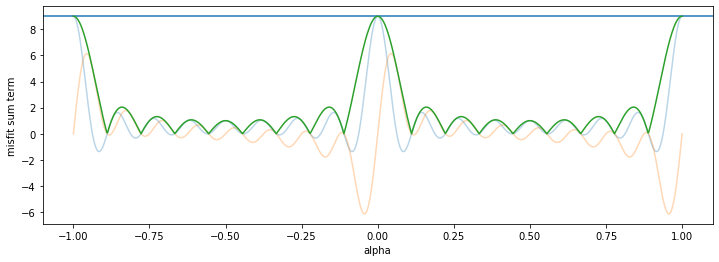

In [4]:
# Frequency misfit term alpha = (f - f')/fs

N = 10

def misfit_term(alpha, N):
    n = np.arange(0, N-1)
    
    alpha_n = np.outer(n, alpha)
    return np.sum(np.exp( 2j*np.pi* alpha_n), axis=0)

def almost_sinc(
    x, phase=np.pi/4):
    return np.sin(2*np.pi*alpha*n + phase) / (np.sqrt(2)*np.pi*n)

def almost_sinc(alpha, N, phase=np.pi/4):
    n = np.arange(0, N-1)
    
    alpha_n = np.outer(n, alpha)
    return np.sum(almost_sinc_per_n, axis=0)

####
alphas = np.linspace(-1, 1, 2*500)
misfit = misfit_term(alphas, N)


fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlabel("alpha")
ax.set_ylabel("misfit sum term")
ax.axhline(N-1)

ax.plot(alphas, np.real(misfit), alpha=0.3, label="Real")
ax.plot(alphas, np.imag(misfit), alpha=0.3, label="Imag")
ax.plot(alphas, np.abs(misfit), label="Abs")
#ax.plot(alphas, np.abs(misfit)**2, label="Power")
if True:
    ax.plot(alphas, (N-1)*almost_sinc(np.sinc(2*np.pi*1.5*alphas)) + (N-1)*np.abs(np.sinc(2*np.pi*1.5*(alphas -1 ))))
if True:
    n= 10
    ax.plot(alphas, -1*(N-1)*np.sin(2*np.pi*alphas*n - np.pi/4))

fig.legend(loc='center right')


In [7]:
# Header

s
